In [1]:
import simpy.power as pwr
import simpy.data as dt
import simpy.plot as pt
from simpy.struct import StackInfo, SimInfo, Map

from scipy import interpolate
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
output_dir = '/home/michal/Documents/GIT/FastSim/jobs/output/'
files = dt.get_files_in_traverse_dir(output_dir, "stack_info.json")
ZA_file = [x for x in files if 'ZA' in x][0]
FP_file = [x for x in files if 'FP' in x][0]
CHI_file = [x for x in files if 'CHI' in x][0]

In [3]:
stack_infos = [dt.get_initialized_StackInfo(a_file, get_data=True, get_sigma=True, get_corr=True)
               for a_file in files]

## Effective growth factor
require multiple redshift slices

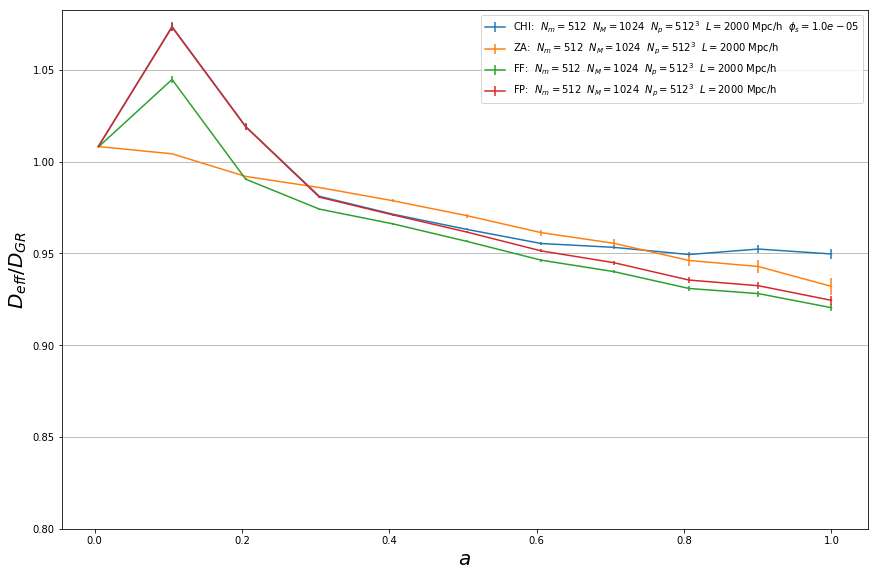

In [4]:
[dt.get_a_eff_from_Pk(stack_info) for stack_info in stack_infos]
[dt.get_a_eff_from_dens_fluct(stack_info) for stack_info in stack_infos]
#pt.plot_eff_time(stack_infos, out_dir='/home/michal/Documents/GIT/FastSim/report/plots/D_eff_new.png' ,show=True)
pt.plot_eff_time(stack_infos,a_eff_type="Pk", show=True)

## Power spectrum
stacked over multiple boxes

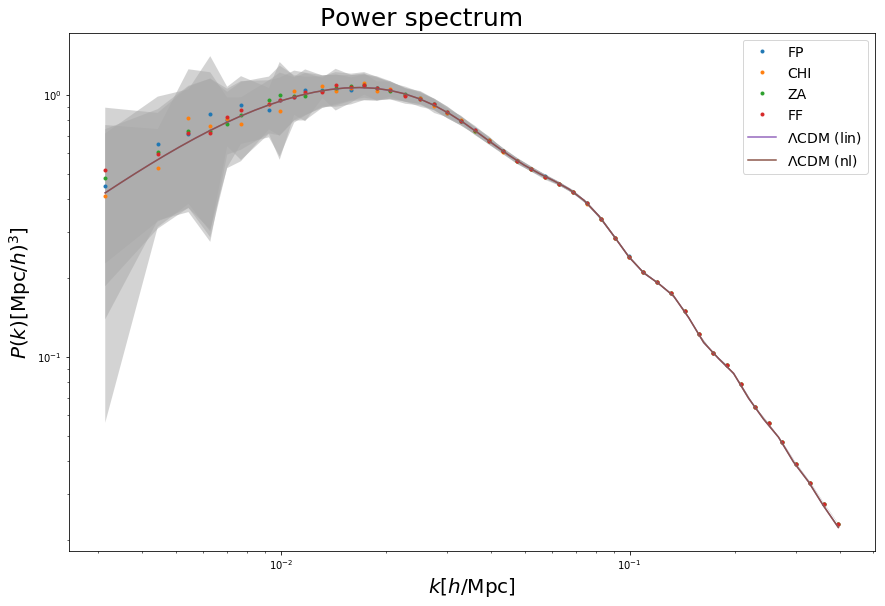

In [5]:
dt.get_plot_mlt_pk_broad(stack_infos, z=200)

## Comparison of CHI to FP
`use_group` to not plot all available groups

In [6]:
dt.compare_chi_fp()

## Correlation function : ZA vs FP

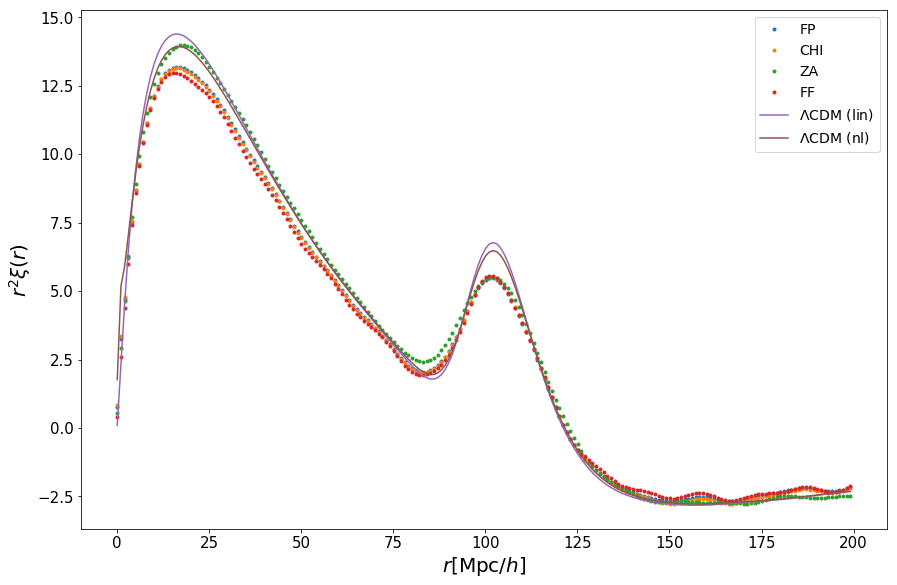

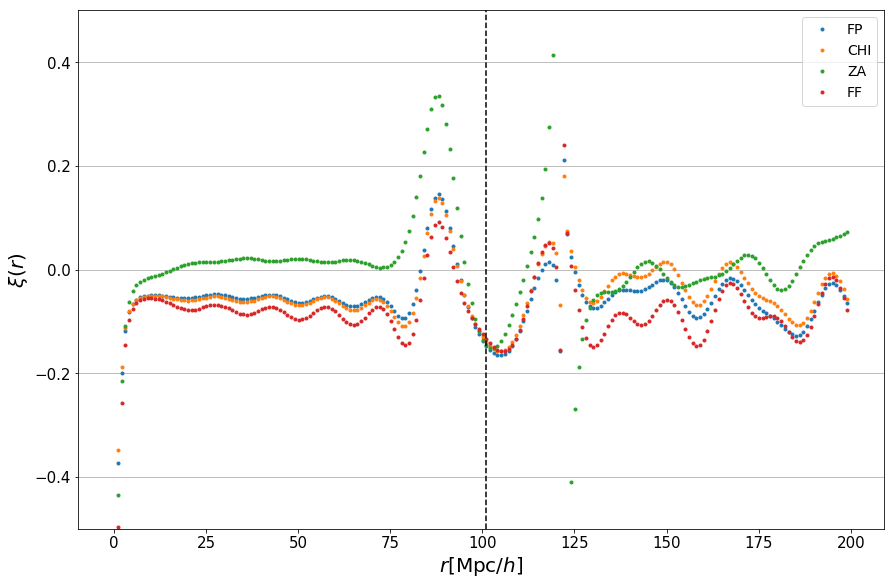

In [13]:
dt.corr_func_comp(files=files)

## FP power spectrum map

In [8]:
# in_dir = '/home/vrastil/Documents/GIT/Adhesion-Approximation/output/FP_run/'
# dt.stack_all(in_dir, rerun='pwr_spec_supp_map')

## CHI evolution

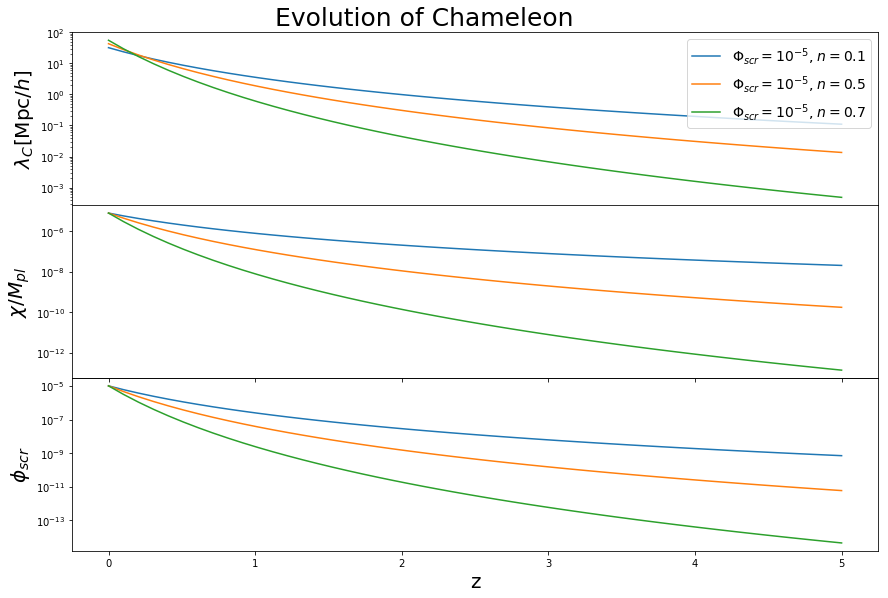

In [9]:
dt.plot_chi_wave_pot(a_file=CHI_file)

## Correlation peak

In [27]:
for a_sim_info in stack_infos:
    dt.get_corr_peak(a_sim_info, cutof=85)
    
zs = a_sim_info.data['zs']
pt.plot_corr_peak(zs, stack_infos)

In [14]:
for key_data in a_sim_info.data.iterkeys():
    print key_data
    if isinstance(a_sim_info.data[key_data], dict):
        for key in a_sim_info.data[key_data].iterkeys():
            print "\t", key

sigma_R
	par
	nl
	lin
	zs
pk_data_par
corr_func
	par
	nl
	lin
	par_peak
	nl_peak
	lin_peak
	zs
pk_list
extrap_pk
zs


In [9]:
out_dir = '/home/michal/Documents/GIT/FastSim/output/test_runs/ZA_run/'

In [5]:
# dt.analyze_all(out_dir, rerun='eff_time')
for a_sim_info in stack_infos:
    dt.get_corr_peak(a_sim_info, cutof=85)

In [11]:
stack_infos[0].data.keys()

['sigma_R', 'pk_data_par', 'corr_func', 'pk_list', 'extrap_pk', 'zs']